In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

def create_mask(image1, image2, threshold=30):
    # Convert the images to grayscale
    gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    # Compute the absolute difference between the two images
    diff = cv2.absdiff(gray1, gray2)

    # Apply a threshold to create a binary mask
    _, mask = cv2.threshold(diff, threshold, 255, cv2.THRESH_BINARY)

    return mask

def normalize_lighting(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply histogram equalization
    equalized = cv2.equalizeHist(gray)

    # Convert back to BGR (if needed)
    equalized_bgr = cv2.cvtColor(equalized, cv2.COLOR_GRAY2BGR)

    return equalized_bgr

def normalize_lighting_color(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Split the image into its RGB channels
    b, g, r = cv2.split(image)

    # Apply histogram equalization to each channel
    equalized_b = cv2.equalizeHist(b)
    equalized_g = cv2.equalizeHist(g)
    equalized_r = cv2.equalizeHist(r)

    # Merge the equalized channels back into a BGR image
    equalized_image = cv2.merge((equalized_b, equalized_g, equalized_r))

    return equalized_image

In [ ]:

# Specify the folder containing the images to be compared (image2)
image_folder = 'inputs'
base_image_name = '1660543200.jpg'
image1 = cv2.imread(os.path.join(image_folder, base_image_name))
folder_path = image_folder  # Replace with the path to your folder
image_files = os.listdir(folder_path)
buff = [image_file for image_file in image_files if image_file.endswith('.jpg')]

## remove the mask image from the image list
buff.remove('1660543200.jpg')
image_files = buff
image_files

['1660554000.jpg',
 '1660546800.jpg',
 '1660561200.jpg',
 '1660564800.jpg',
 '1660568400.jpg',
 '1660557600.jpg',
 '1660572000.jpg',
 '1660550400.jpg',
 '1660575600.jpg']

inputs/1660554000.jpg


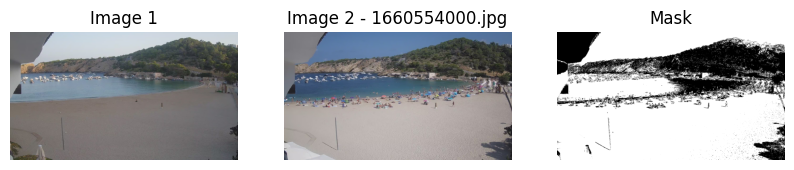

inputs/1660546800.jpg


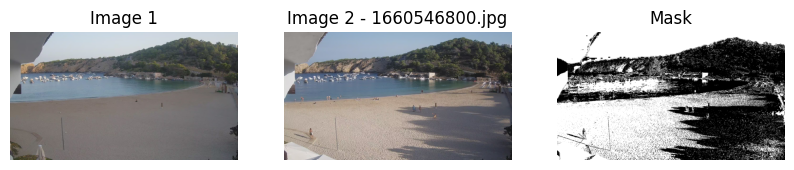

inputs/1660561200.jpg


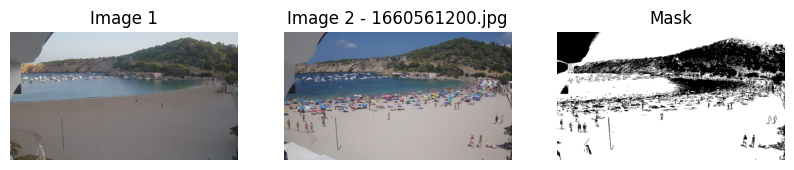

inputs/1660564800.jpg


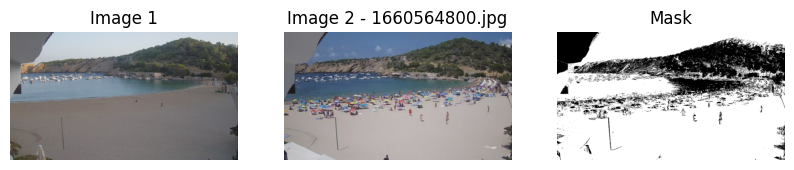

inputs/1660568400.jpg


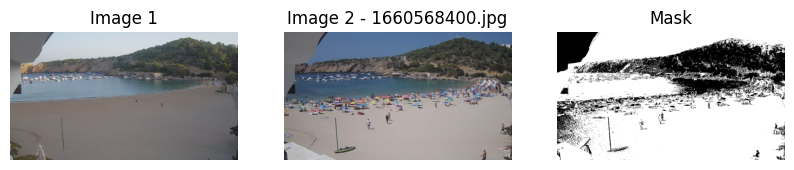

inputs/1660557600.jpg


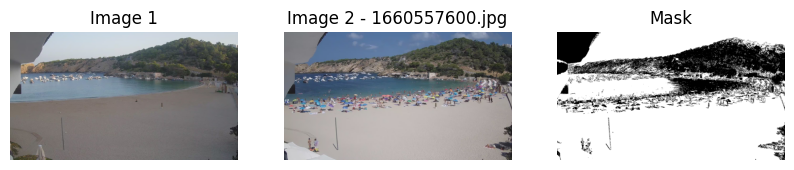

inputs/1660572000.jpg


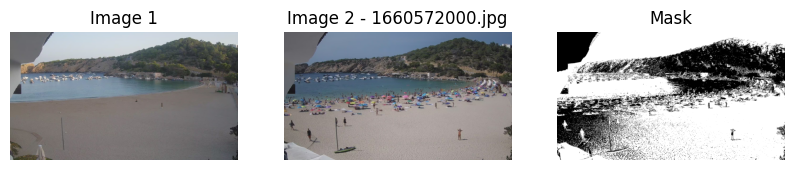

inputs/1660550400.jpg


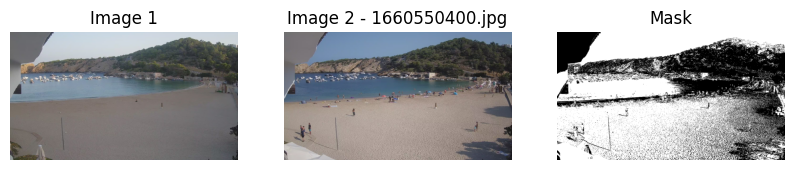

inputs/1660575600.jpg


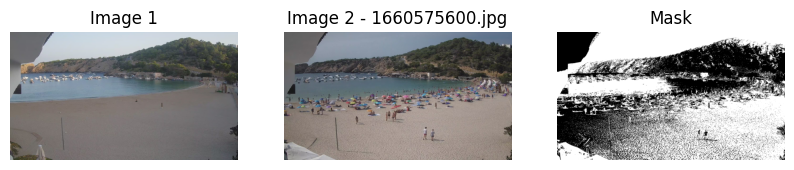

In [ ]:
# Loop through each image in the folder
for image_path in image_files:
    print(os.path.join(folder_path, image_path))
    # Read the current image
    image2 = cv2.imread(os.path.join(folder_path, image_path))

    # Create a mask
    mask = create_mask(image1, image2)

    # Plot the original images and the mask using matplotlib
    plt.figure(figsize=(10, 5))

    plt.subplot(131)
    plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
    plt.title('Image 1')
    plt.axis('off')

    plt.subplot(132)
    plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
    plt.title(f'Image 2 - {image_path}')
    plt.axis('off')

    plt.subplot(133)
    plt.imshow(mask, cmap='gray')
    plt.title('Mask')
    plt.axis('off')

    plt.show()

In [ ]:
# # Loop through each image in the folder and normalize lighting
# image_files = os.listdir(folder_path)

# Specify the folder containing the images to be normalized
# folder_path = image_folder

# Create the output folder if it doesn't exist
output_folder = 'normalized_images'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
buff = image_files.copy()
buff.append(base_image_name)
for image_file in buff:
    input_image_path = os.path.join(folder_path, image_file)
    normalized_image = normalize_lighting(input_image_path)

    # Save the normalized image to the output folder
    output_image_path = os.path.join(output_folder, image_file)
    cv2.imwrite(output_image_path, normalized_image)

# Create the output folder if it doesn't exist
output_folder = 'normalized_color_images'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
buff = image_files.copy()
buff.append(base_image_name)
for image_file in buff:
    input_image_path = os.path.join(folder_path, image_file)
    normalized_image = normalize_lighting_color(input_image_path)

    # Save the normalized image to the output folder
    output_image_path = os.path.join(output_folder, image_file)
    cv2.imwrite(output_image_path, normalized_image)

In [ ]:
buff

['1660554000.jpg',
 '1660546800.jpg',
 '1660561200.jpg',
 '1660564800.jpg',
 '1660568400.jpg',
 '1660557600.jpg',
 '1660572000.jpg',
 '1660550400.jpg',
 '1660575600.jpg',
 '1660543200.jpg']

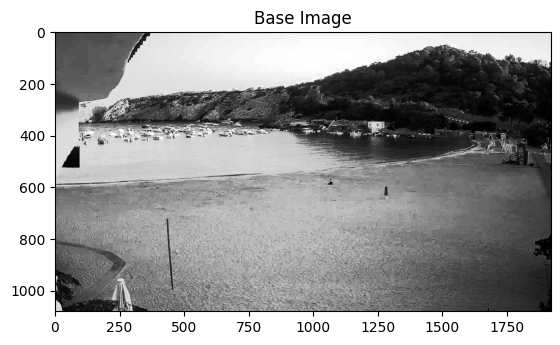

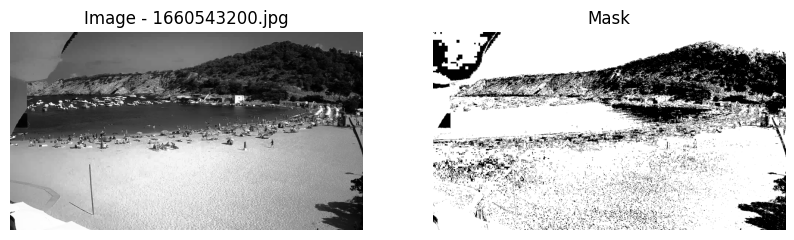

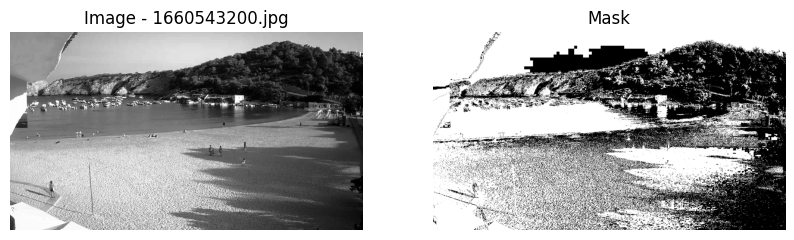

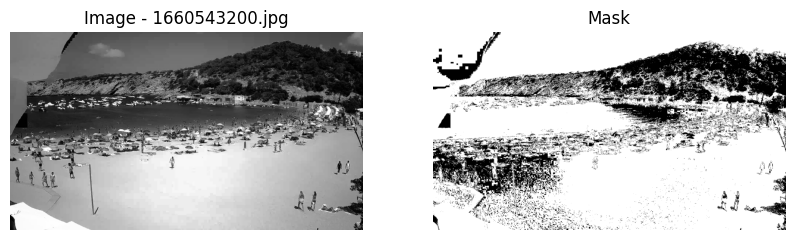

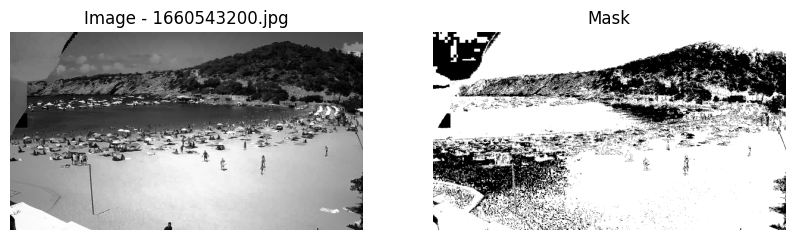

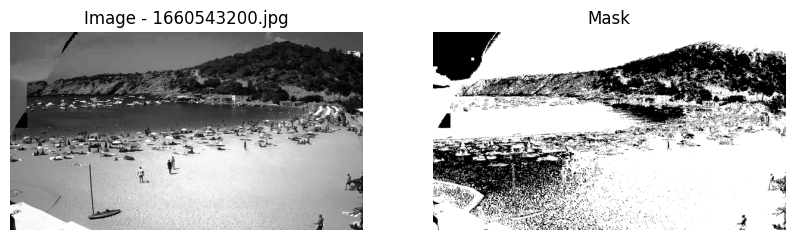

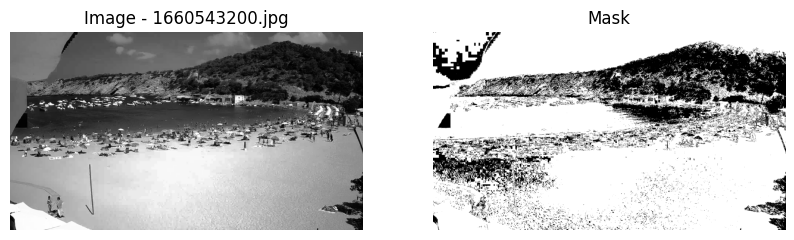

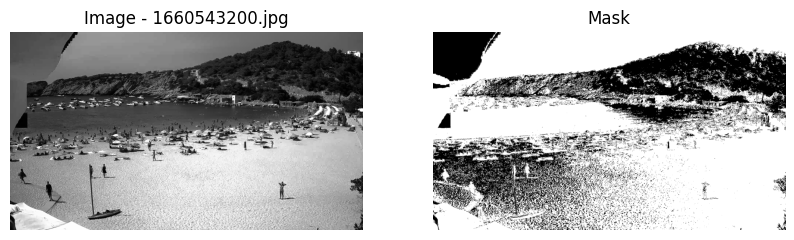

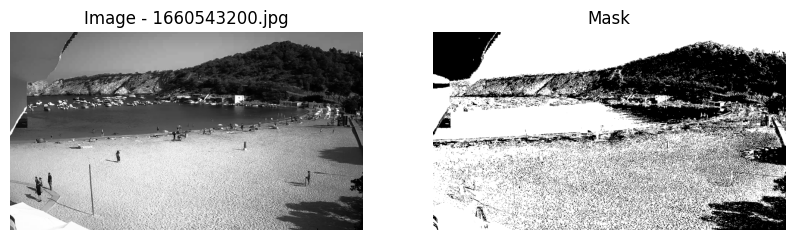

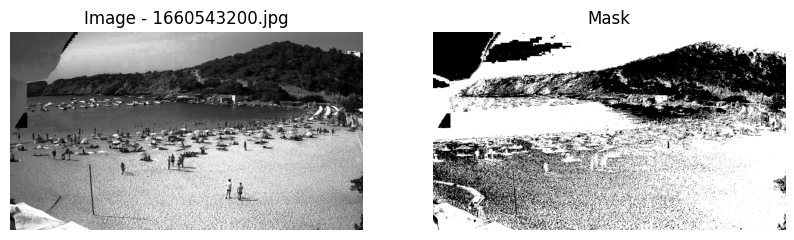

In [ ]:
norm_folder_path = "normalized_images"
norm_image1 = cv2.imread(os.path.join(norm_folder_path,base_image_name))

plt.imshow(cv2.cvtColor(norm_image1, cv2.COLOR_BGR2RGB))
plt.title('Base Image')

for image_path in image_files:
    # Read the current image
    image2 = cv2.imread(os.path.join(norm_folder_path, image_path))

    # Create a mask
    mask = create_mask(norm_image1, image2)

    # Plot only the current image and the inverted mask using matplotlib
    plt.figure(figsize=(10, 5))

    plt.subplot(121)
    plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
    plt.title(f'Image - {image_file}')
    plt.axis('off')

    plt.subplot(122)
    plt.imshow(mask, cmap='gray')
    plt.title('Mask')
    plt.axis('off')

    plt.show()

In [ ]:
norm_color_folder_path = "normalized_color_images"
norm_image1 = cv2.imread(os.path.join(norm_color_folder_path,base_image_name))

plt.imshow(cv2.cvtColor(norm_image1, cv2.COLOR_BGR2RGB))
plt.title('Base Image')

for image_path in image_files:
    # Read the current image
    image2 = cv2.imread(os.path.join(norm_color_folder_path, image_path))

    # Create a mask
    mask = create_mask(norm_image1, image2)

    # Plot only the current image and the inverted mask using matplotlib
    plt.figure(figsize=(10, 5))

    plt.subplot(121)
    plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
    plt.title(f'Image - {image_path}')
    plt.axis('off')

    plt.subplot(122)
    plt.imshow(mask, cmap='gray')
    plt.title('Mask')
    plt.axis('off')

    plt.show()

In [ ]:
%%shell
jupyter nbconvert --to html /content/Untitled4.ipynb

[NbConvertApp] Converting notebook /content/Untitled4.ipynb to html
[NbConvertApp] Writing 8472415 bytes to /content/Untitled4.html
